## Analyze Type 1 & Type 2 Diabetes Patients

##### Setup the imports.

In [80]:
import site, sys
sys.path.insert(0,site.USER_SITE)

from pyqe import *

##### Always start with creating a query object. 

Apart from creating Query object, it does the following that are required for setting up your profile:
- Ask for username and password for login

In [81]:
# Always begin your script by creating Query object
total_patients_query = Query('Total_Participants')

##### Configure by selecting Study and Study config.

Use get_study_list() method to fetch all available studies that you have access to.

Use set_study() method to select a study that you are interested in (by passing the study ID).

In [82]:
total_patients_query.get_study_list()

# any STUDY_ID from above list
total_patients_query.set_study('0368b0c9-fe26-4a64-b6ba-5378914fe107') 

Study Name - Study Id
(1) Accept - fb4269d3-f6ac-4f81-85da-b80ce277793e
(2) Accept archive - ee451513-3daa-426a-9cfd-b5690a93a3ac
(3) CRONOS by DGPM - 38ce29c0-eb76-45cc-ba4f-56395f8c49e0
(4) DE-SynPUF 100 percent - eccf4aeb-2617-4708-a145-69e02b9a0279
(5) DE-SynPUF 5 percent - 194c627c-5098-4e6d-b849-f0e83d905e1f
(6) DE-SynPUF [Demo Dataset] - 0368b0c9-fe26-4a64-b6ba-5378914fe107
(7) Demo Study: COVID-19 symptom study - 121ec9da-3706-4e20-885d-101a7e421ed2
(8) ECOV - f875fdc4-c180-45f3-bdbb-a68fb1476338
(9) FeMFit - 69990b1e-3b4c-4e7f-9d06-84cc2cdf88d0
(10) Univie Demo-Study - 0b7e9885-ed8e-456f-89e1-0a1d3b0f615c


Similar to above step, use get_config_list() method to fetch all available configurations corresponding to the study.

Use set_study_config() method to select a config (by passing the config ID).

In [83]:
total_patients_query.get_config_list()

# any CONFIG_ID from above list
total_patients_query.set_study_config('522bcd53-1dde-456d-9cff-266b4280ad59') 

Assignment Name, Config Name - Config Id
(1) DEFAULT-ASSIGNMENT, OMOP_GDM_PA_CONF_OLD - 92d7c6f8-3118-4256-ab22-f2f7fd19d4e7
(2) Default_assignment_OMOP_GDM_PA_CONF, OMOP_GDM_PA_CONF - 522bcd53-1dde-456d-9cff-266b4280ad59
(3) GDM-PA Default, DemoGDMPAConfig - daac6e40-9fdc-48f8-bd9b-181571102d91
(4) PUBLIC-CHART_DEFAULT-ASSIGNMENT, OMOP_GDM_PA_CONF - 522bcd53-1dde-456d-9cff-266b4280ad59


##### Initialize Patient object and add filter criteria

In [84]:
patients = Person.Patient()
constraint_age_lesser_than_85_years = Constraint()
constraint_age_lesser_than_85_years.add(Expression(ComparisonOperator.LESS_THAN_EQUAL, 85))

patients.add_age([constraint_age_lesser_than_85_years])

##### Define criteria for Type 2 Diabetes

In [85]:
# Condition Concept IDs for Diabetes Mellitus 2

diabetes2_conditionOcc = Interactions.ConditionOccurrence("Type 2 Diabetes condition")
# diabetes2_condition_concepts = ConceptSet(
#                            'Conditions',
#                             Domain.CONDITION, 
#                            ['44054006', '8801005', '190331003', '421326000', '443694000', '422014003', '421326000']) 


diabetes2_condition_concepts = ConceptSet(
                           'Conditions',
                            Domain.CONDITION, 
                           ['3329005', '195771', '201530', '376065', '40482801', '443732']) 

diabetes2_conditionOcc.add_concept_set(diabetes2_condition_concepts)

##### Define criteria for Type 1 Diabetes

In [86]:
# Diabetes type 1

diabetes1_conditionOcc = Interactions.ConditionOccurrence("Type 1 Diabetes condition")
diabetes1_condition_concepts = ConceptSet(
                           'Conditions',
                            Domain.CONDITION, 
                           ['201254', '318712', '435216', '40484648', '200687', '377821']) 
diabetes1_conditionOcc.add_concept_set(diabetes1_condition_concepts)

##### Combine Patient and Diabetes filter criteria

In [87]:
# patient_criteriagroup = CriteriaGroup(MatchCriteria.ALL, [patients, exclude_Death])

diabetes_criteriagroup = CriteriaGroup(
                        MatchCriteria.ANY, [diabetes1_conditionOcc, diabetes2_conditionOcc])

patient_criteriagroup = CriteriaGroup(MatchCriteria.ALL, [patients])

patient_criteriagroup.add_exclusive_group(diabetes_criteriagroup)


total_patients_query.add_criteria_group(patient_criteriagroup)

##### Get Patient count for the defined cohort

In [88]:
# create Result object and fetch the patient count
total_patients_req = total_patients_query.get_patient_count_filter()
total_patients = Result().get_patient_count(total_patients_req)
print(f'\nTotal participants: {total_patients}')

Domain.CONDITION
Domain.CONDITION

Total participants: 228


##### Get Dataframe for Patient entity alone

In [89]:
# Generate Request for Dataframe cohort
request_df = total_patients_query.get_dataframe_cohort([],'Patient')

# Get Patient Dataframe. Select (1) Patient
patient_df = Result().download_dataframe(request_df)

# Peek Into the Patient Demographics Data
selective_patient_df = patient_df[['pid', 'gender', 'dateofbirth', 'ethnicity', 'race', 'state']]

selective_patient_df.head(10)

Domain.CONDITION
Domain.CONDITION
{'mriquery': b'eJzdl99P2zAQx/+VKs+kip2fnbaHQtnEC0wM8YL24NhOayl1MsdBVIj/feekBcbqxWUsm/aWxOfP+e6+Psf3Hq1WldILXggptKik925y71GiWNM/VVJzqeH55sWL3tQcnryPotRcncAM72jiCUmoFrdmpCBlw+GTJOvO8Jg0gk4WRBNjCKxCLD8TvTJjNdHCkDtCo4mk/Lxd51zBYPDs49nihTXRWom81XzPcncrnO9srH6nT5jpfMk9m8c9dsBrtCJCateEnd7VijeNyTXMr2quiK5MoN77D+bLLSlbY5jFD1/hdTftuKpKTuQJIMEbZKab3MV3vvAcTS8uvYdDqCbD7Nbk4UqseV9qGJRtWR7g8chWGWftXMGECZosBMk5JH8CNNbL1VpSqAhklhqjZvpoX1HaKsUhoL1aQ9bKD+Gm6A3lOOjsmQ4fh+GB8loLZpfvcBDD5LcU/A9693CAcBy5Snmrz9/0GaIsRXhcn1EYY5SM7DOIsiiJsnG94iBIsnTkiqZphtFBPsfvnSbK1zVB/OebIH59/8D/QxPEf7MJhiGeBUE87p5BszhND9szb9AbUBwGY/eGJEhGzq3pvDgLRs5uFIVpeNi59i//QR7msO8n3U1juznh9YwZkxjjnLI49BFj3I/ihPkzWhQ+TpI8gjIRFs+eWtI1V01/J/LmfSh3XVO7MetZttCyuaFq1Zo+XRVFw029gg5QtmvZPHYEp0tHBcCumOal4d8Ma6eFXwP4HeRVkrJvT3s4yI0DDVO3jYWB3RgnVSv1xsII3RhfYB22lERuiFO9koIK60pix8zuMNsDgFbMtrDEjViSRs9bDfduzhb2MFM32icu2XYT/MzI3BjLjjEc4OwVOLsiHaV9SahtPchR1XDc8+HokKO+n9HswTnqvLYTHGVeU7PdbBBHka+hma4uimOhwMSCclT3hhM1QHJ

,pid,gender,dateofbirth,ethnicity,race,state
0,2,MALE,1943-01-01,Not Hispanic or Latino,White,PA
1,4,MALE,1941-06-01,Hispanic or Latino,No matching concept,CO
2,6,MALE,1943-10-01,Not Hispanic or Latino,Black or African American,NY
3,19,FEMALE,1942-07-01,Not Hispanic or Latino,White,UT
4,25,MALE,1965-04-01,Not Hispanic or Latino,White,AZ
5,27,FEMALE,1940-04-01,Not Hispanic or Latino,White,OR
6,30,FEMALE,1959-11-01,Not Hispanic or Latino,White,CA
7,44,FEMALE,1957-11-01,Not Hispanic or Latino,White,VA
8,56,MALE,1943-10-01,Not Hispanic or Latino,White,PA
9,63,FEMALE,1964-05-01,Not Hispanic or Latino,White,CA


##### Define the Necessary columns required for our analysis and get their data. Patient ID, Interactions End date, Date of death are some of the below ones.

In [90]:
specific_columns = total_patients_query.get_entities_dataframe_cohort(['patient.attributes.pid','patient.attributes.Gender', 
                                                                       'patient.attributes.dateOfBirth',
                                                                       'patient.interactions.conditionoccurrence.attributes.conditionname', 
                                                                       'patient.interactions.conditionoccurrence.attributes.startdate',
                                                                       'patient.interactions.conditionoccurrence.attributes.enddate',
                                                                       'patient.interactions.visit.attributes.enddate',
                                                                       'patient.interactions.proc.attributes.procdate',
                                                                       'patient.interactions.observation.attributes.obsdate',
                                                                       'patient.interactions.measurement.attributes.measurementdate',
                                                                       'patient.interactions.drugexposure.attributes.enddate',
                                                                       'patient.interactions.deviceexposure.attributes.enddate',
                                                                       'patient.interactions.death.attributes.deathdate'])

specified_dfs = Result().download_all_entities_dataframe(specific_columns)

Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
Domain.CONDITION
{'mriquery': b'eJzdV99P2zAQ/leqPJPKdn522h6AsokXmDbEC9qDY1/AUup0zgWBEP/7zkkLjLW0ZSyb9mb7zt/57j5/ie8CVV/VDqdQGmvQ1DZ4N7oLlHS66Ue1RbBI44tnE7ydA42Cj6ZCcIe0I9gbBcZKhebaW0pZNUBLVs46xwPZGDWaSpTekbBKc/lZ4pW3zSUaj9whNCitgpN2VoAjI3uyeDx95i0RnSlahBXHXZ5wf+mzNu74EWa8fwnBuogr/AivQSeNxW0LdnQzd9A0vta0v56Dk1j7RIP3H/zKtaxa75gn999outx2UNcVSHtIkBSNKtNt7vI7mQZbup5+Ce53QfUV1te+DmdmBn2ryWjbqtoh4t66zmzNnTPaMOKjqZEFUPFHhKZ7uq5tKXWEKqu8UzN+8K+Vap0DSmgl1/jazm+CG/M3pOPGYE94+GCmgYI5Gr2evpuT2Iz8loT/ie+BYFwk8bZUXvDzN2NGPM+4GDZmHCWCpwPHZHEep3E+bFTBWJpnA3c0y3LBd4o5vHb6LF8nguLPi6B4vX6I/0EExd8UwSgSE8aSYe8MnyRZttudeQNt4EnEhtaGlKUD19Yrr8jZwNWN4yiLdvuu/ct/kLsF7PWke2ksLidNj7V3SYQolE6ikGsNYZykOpyosgxFmhYxtUnqZPIoSefgmv5NFOz

##### Combine data from different Interaction entities for end date and choose patient's last interaction end date / Max End Date.

In [91]:
import pandas as pd

concatenated_dfs = pd.concat([
                                specified_dfs['measurement'].rename(columns={'measurementdate': 'enddate'}), 
                                specified_dfs['deviceexposure'],
                                specified_dfs['visit'],
                                specified_dfs['proc'].rename(columns={'procdate': 'enddate'}),
                                specified_dfs['observation'].rename(columns={'obsdate': 'enddate'}),
                                specified_dfs['ConditionOccurrence'],
                                specified_dfs['drugexposure']

])
concatenated_dfs_max_enddate = concatenated_dfs.groupby(['pid'],as_index=False)['enddate'].max().reindex(columns=['pid', 'enddate'])
concatenated_dfs_max_enddate.head(10)

,pid,enddate
0,2,2011-01-30
1,4,2010-09-23
2,6,2010-09-26
3,19,2010-05-06
4,25,2010-12-01
5,27,2010-11-18
6,30,2010-12-29
7,44,2010-11-25
8,56,2010-10-18
9,63,2010-10-17


##### Filter the Diabetes condition and choose the patients earliest date of diagnosis / Minimum start date

In [92]:
condOcc_df = specified_dfs['ConditionOccurrence']
condOcc_diabetes_df = condOcc_df[condOcc_df['conditionname'].str.contains("diabetes")]
co_pid_start_date_df = condOcc_diabetes_df[['pid', 'startdate']]
co_pid_groupby_start_date_min_df = co_pid_start_date_df.groupby(['pid'],as_index=False)['startdate'].min().reindex(columns=['pid', 'startdate'])
co_pid_groupby_start_date_min_df.head(10)

,pid,startdate
0,2,2009-05-11
1,4,2009-11-25
2,6,2009-12-21
3,19,2008-01-03
4,25,2008-03-22
5,27,2009-05-04
6,30,2008-07-13
7,44,2008-01-10
8,56,2008-04-17
9,63,2008-03-04


##### Form the table with surival period and binary values for dead or alive for the cohort for Kaplan Meier Analysis

In [93]:
import pandas as pd
death_df = specified_dfs['death']
joined_death_condOcc_df = pd.merge(co_pid_groupby_start_date_min_df, death_df, on='pid', how='left')
joined_death_start_end_df = pd.merge(joined_death_condOcc_df, concatenated_dfs_max_enddate, on='pid', how='inner')
joined_death_start_end_df['Dead'] =  joined_death_start_end_df.apply(lambda row: 0 if pd.isnull(row['deathdate']) else 1, axis=1)
joined_death_start_end_df['Survival_days'] = joined_death_start_end_df.apply(lambda row: (pd.to_datetime(row['enddate']) - pd.to_datetime(row['startdate'])).days if pd.isnull(row['deathdate']) else (pd.to_datetime(row['deathdate']) - pd.to_datetime(row['startdate'])).days, axis=1)

joined_death_start_end_df = joined_death_start_end_df.sort_values(by=['Survival_days'], ascending=True)
joined_death_start_end_df.head(10)

,pid,startdate,deathdate,enddate,Dead,Survival_days
156,755,2010-08-31,NaN,2011-01-08,0,130
61,330,2010-06-24,NaN,2010-11-08,0,137
49,282,2010-04-04,NaN,2010-11-04,0,214
67,343,2010-03-01,NaN,2010-10-27,0,240
184,888,2010-03-07,NaN,2010-11-20,0,258
222,1069,2009-08-09,NaN,2010-05-06,0,270
2,6,2009-12-21,NaN,2010-09-26,0,279
198,963,2009-10-21,NaN,2010-08-05,0,288
1,4,2009-11-25,NaN,2010-09-23,0,302
173,848,2010-01-12,NaN,2010-12-24,0,346


### Kapalan Meier 

##### With the above dataframe and using the lifelines library, Kapalan Meier Survival curve is plotted along with censor ticks on display. 
##### With Date of diagnosis for Diabetes as start event and date of death as the end event.

##### From the below curve, the survival looks quite good after diagnosis of Diabetes.

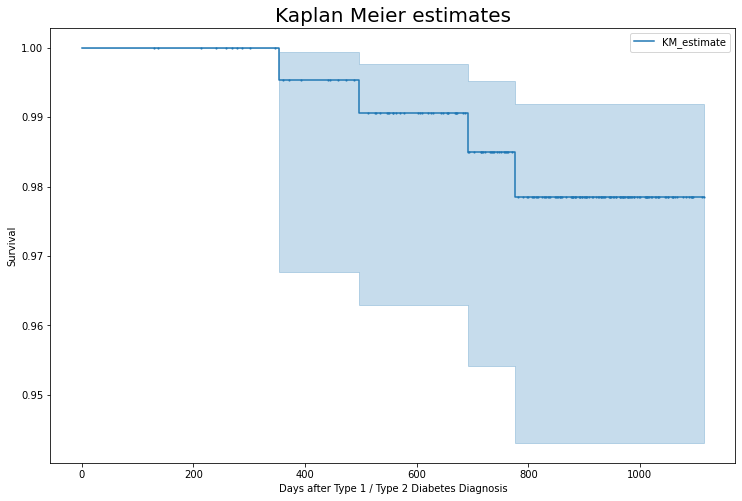

In [94]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
T = joined_death_start_end_df['Survival_days']
E = joined_death_start_end_df['Dead']
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)
plt.figure(figsize=(27,8))
ax1 = plt.subplot(121)

kmf.plot_survival_function(show_censors=True, ax=ax1, censor_styles={'ms': 1, 'marker': 's'})

plt.title("Kaplan Meier estimates", fontdict={'fontsize':20})
plt.xlabel("Days after Type 1 / Type 2 Diabetes Diagnosis")
plt.ylabel("Survival")
plt.show()

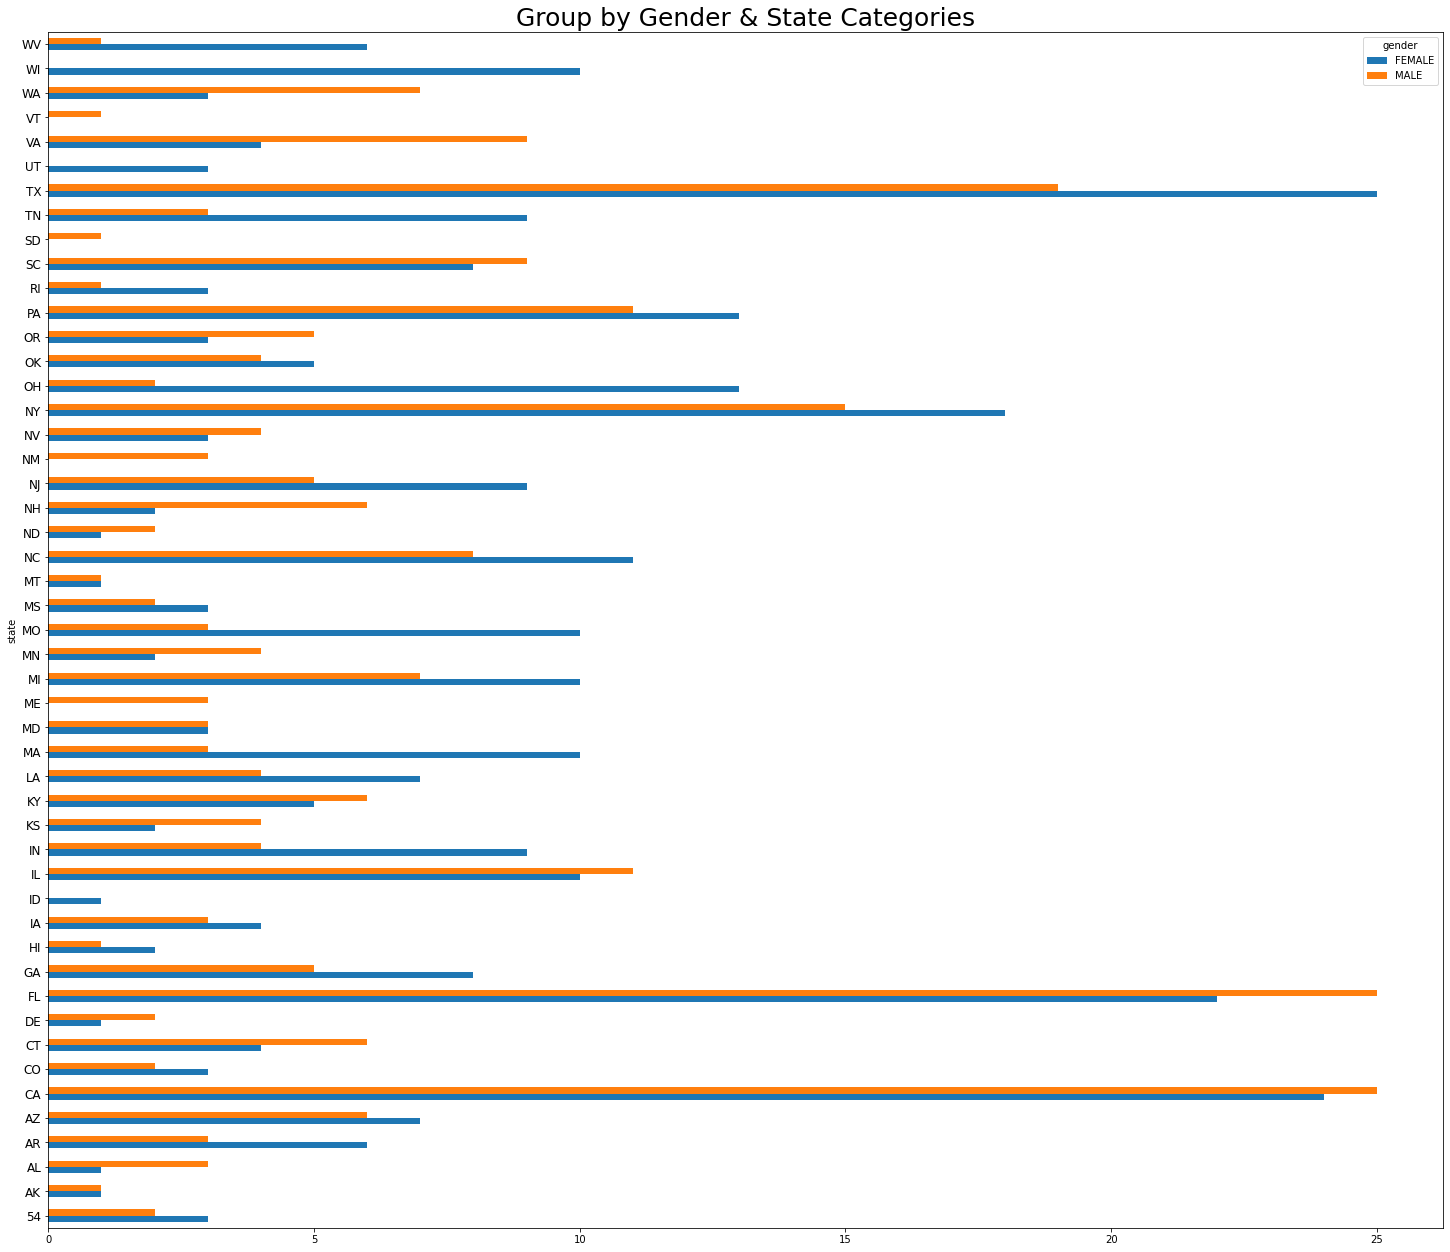

In [25]:
import pandas as pd

barh_table = pd.crosstab(selective_patient_df.state, selective_patient_df.gender)
ax = barh_table.plot.barh(figsize=(25,22), title='Group by Gender & State Categories')
ax.yaxis.set_tick_params(labelsize='large')
ax.title.set_size(25)

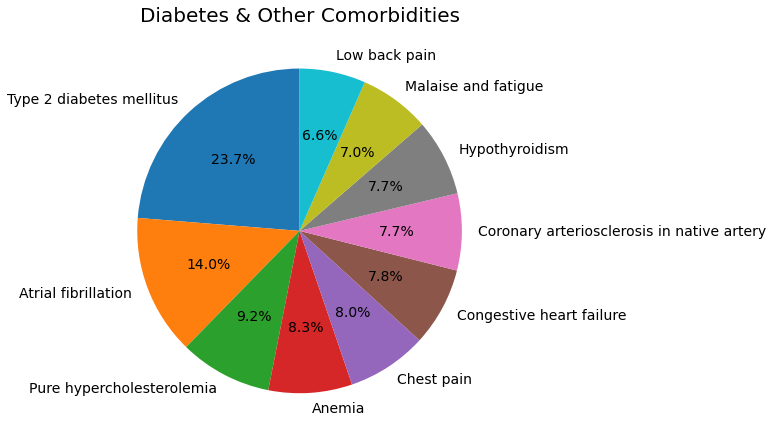

In [26]:
import matplotlib.pyplot as plt

# Group Data by Conditions
co_mini_df = condOcc_df[['conditionname', 'pid']]
co_group_df = co_mini_df.groupby(['conditionname']).count()
co_group_df.rename(columns = {'pid':'count'}, inplace = True)

# Sort & Pick the top 10 conditions
co_group_df.sort_values(by=['count'], inplace=True, ascending=False)
co_group_df_top10 = co_group_df.head(10)
plt.figure(figsize=(16,8))

# plot pie chart
ax1 = plt.subplot(121)
co_group_df_top10.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)

plt.title('Diabetes & Other Comorbidities', fontdict={'fontsize':20})
plt.axis('off')
plt.show()